# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

# Preparation and Exploratory Analysis

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('data/chocolate_bars.csv')
df.head()
data=df.drop(labels=['id', 'year_reviewed'], axis=1)
data.describe()

,cocoa_percent,num_ingredients,rating
count,2530.000000,2443.000000,2530.000000
mean,71.639723,3.041343,3.196344
std,5.616724,0.913728,0.445321
min,42.000000,1.000000,1.000000
25%,70.000000,2.000000,3.000000
50%,70.000000,3.000000,3.250000
75%,74.000000,4.000000,3.500000
max,100.000000,6.000000,4.000000


In [297]:
df.head(10)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


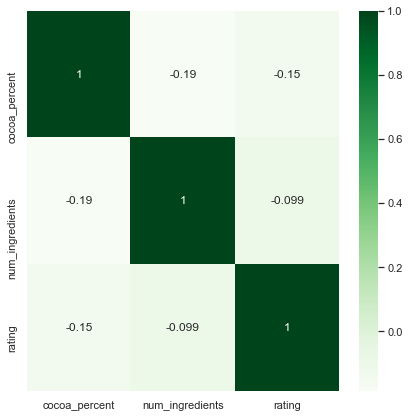

In [298]:
corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

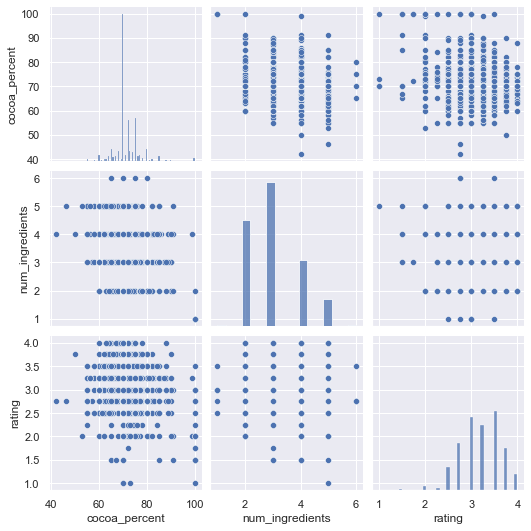

In [299]:
sns.pairplot(data)
plt.show()

# 1.Countries&Rating

In [300]:
df_origin=df.groupby("bean_origin")["rating"].mean()
df_origin.describe()

count    62.000000
mean      3.136862
std       0.186082
min       2.714286
25%       3.044471
50%       3.164335
75%       3.250000
max       3.625000
Name: rating, dtype: float64

In [301]:

df_origin2= df_origin.sort_values()
df_origin

bean_origin
Australia    3.250000
Belize       3.233553
Blend        3.038462
Bolivia      3.181250
Brazil       3.262821
               ...   
U.S.A.       3.242424
Uganda       3.065789
Vanuatu      3.115385
Venezuela    3.231225
Vietnam      3.287671
Name: rating, Length: 62, dtype: float64

# 2.Countries&Review

In [302]:
df_review=df.groupby("bean_origin")["review"].agg("count")
df_review.describe()

count     62.000000
mean      40.806452
std       63.159916
min        1.000000
25%        3.000000
50%       12.500000
75%       48.250000
max      253.000000
Name: review, dtype: float64

In [303]:
df_review

bean_origin
Australia      3
Belize        76
Blend        156
Bolivia       80
Brazil        78
            ... 
U.S.A.        33
Uganda        19
Vanuatu       13
Venezuela    253
Vietnam       73
Name: review, Length: 62, dtype: int64

# 3.Average Rating & Total Number of Review Through Country Origin

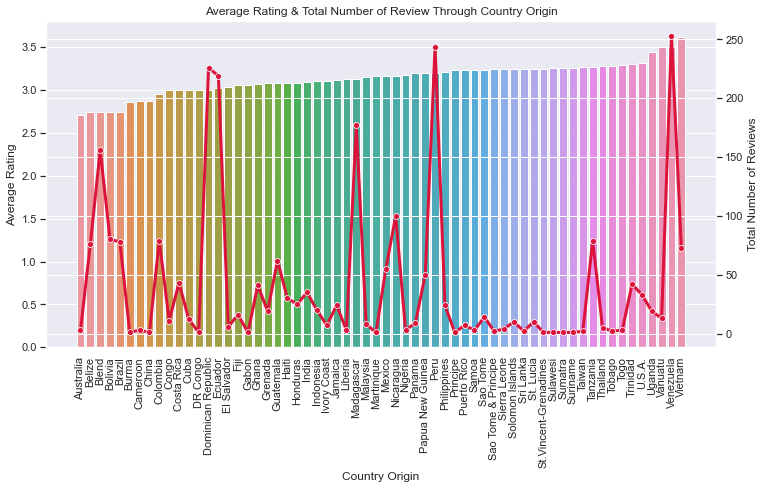

In [304]:

sns.set(rc={'figure.figsize':(12,6)})
ax=sns.barplot(x=df_origin2.index,y=df_origin2.array)
plt.xticks(rotation=90)
ax2 = ax.twinx()
sns.lineplot(x=df_review.index, y=df_review.array, marker='o', color='crimson', lw=3, ax=ax2)
ax.set_xlabel('Country Origin')
ax.set_ylabel('Average Rating')
ax2.set_ylabel('Total Number of Reviews')
plt.title("Average Rating & Total Number of Review Through Country Origin")
plt.show()

From figure we can conclude that,highest ratings comes from Vietnam and lowest ratings comes from Australia.There is not a strong relationship between number of reviews and average ratings between countries.Number of reviews is highest in Venezuella.

# 4.Cacao bean's origin as an indicator of quality

# Anova

Null hypothesis: Groups means are equal (no variation in means of groups)

Alternative hypothesis: At least, one group mean is different from other groups

H0: μ1=μ2=…=μp

H1: All μ are not equal
 
 
We can reject null hyphothesis with 90 percent confidence and with error of 0.1. We can say that there is a relationship between bean origin and rating.(Not highly)

In [305]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('rating ~ C(bean_origin)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(bean_origin),61.0,17.164634,0.281387,1.433765,0.016171
Residual,2468.0,484.364047,0.196258,NaN,NaN


# 5.Cacao & Rating

From anova table below, we can say that there is a strong relationship between rating and cacao_percent.From related figure,we can conclude that, most of the consumers prefer cacao in their product around 70 percent.

In [306]:
model = ols('rating ~ C(cocoa_percent)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(cocoa_percent),45.0,47.523241,1.056072,5.778087,4.053822e-30
Residual,2484.0,454.005440,0.182772,NaN,NaN


In [307]:
df_cocoa=df.groupby("cocoa_percent")["rating"].mean()
df_cocoa2= df_cocoa.sort_values()
df_cocoa2

cocoa_percent
53.0     2.000000
91.0     2.166667
100.0    2.285714
89.0     2.625000
99.0     2.625000
72.5     2.750000
60.5     2.750000
42.0     2.750000
57.0     2.750000
46.0     2.750000
84.0     2.812500
55.0     2.859375
81.0     2.916667
61.0     2.964286
90.0     2.972222
62.0     2.984375
85.0     3.000000
83.0     3.000000
60.0     3.005435
76.0     3.021429
82.0     3.041667
71.0     3.063953
77.0     3.077381
80.0     3.084270
71.5     3.125000
73.5     3.125000
58.0     3.125000
75.0     3.165323
65.0     3.175000
64.0     3.183824
73.0     3.193182
72.0     3.210169
88.0     3.218750
74.0     3.223881
56.0     3.250000
86.0     3.250000
87.0     3.250000
79.0     3.250000
70.0     3.263384
68.0     3.288194
67.0     3.345588
66.0     3.348214
78.0     3.380952
69.0     3.461538
63.0     3.535714
50.0     3.750000
Name: rating, dtype: float64

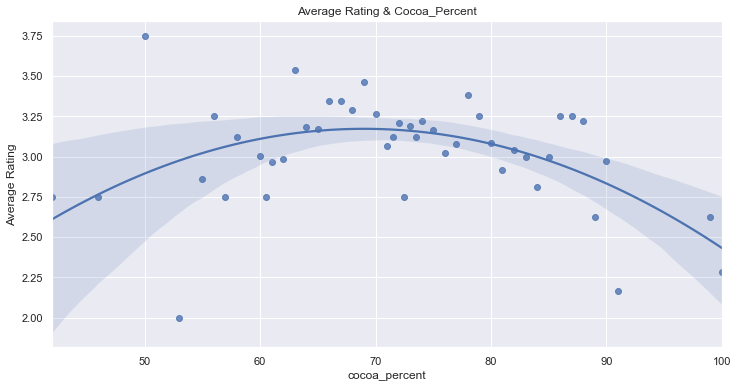

In [308]:
ax=sns.regplot(x=df_cocoa2.index,y=df_cocoa2.values,data=df_cocoa2,order=2)
ax.set_ylabel('Average Rating')
plt.title("Average Rating & Cocoa_Percent")
plt.show()

# 6.Effect of Lecithin
Although research indicates that some consumers want to avoid bars with lecithin,results show that average rating slightly drops without lecithin.

In [310]:
ingr_expanded = df["ingredients"].str.split(',', expand=True)
ingr_expanded.columns = ['ingr'+str(i) for i in ingr_expanded.columns]

ingr_expanded_concat = pd.concat([df,ingr_expanded], axis=1)

df10 = pd.melt(ingr_expanded_concat, id_vars=['bar_name',"rating"], value_vars=ingr_expanded.columns).dropna()
df10

,bar_name,rating,variable,value
0,"Kokoa Kamili, batch 1",3.25,ingr0,B
1,"Zorzal, batch 1",3.50,ingr0,B
2,"Bejofo Estate, batch 1",3.75,ingr0,B
3,"Matasawalevu, batch 1",3.00,ingr0,B
4,"Sur del Lago, batch 1",3.00,ingr0,B
...,...,...,...,...
12623,Goddess Blend,3.25,ingr4,L
12703,Trinite,2.75,ingr5,Sa
12706,"Porcelana, Mexique",3.50,ingr5,Sa
13560,Dominican Republic,2.75,ingr5,Sa


In [311]:

df11 = df10[df10.value != "L"]
withL=str(df11["rating"].mean())
withoutL=str(df10["rating"].mean())
print("Mean with Lecithin: " + withL)
print("Mean without Lecithin: " + withoutL)

Mean with Lecithin: 3.2006991494882513
Mean without Lecithin: 3.1973755047106325


Although average rating with or without lecithin ingredient does not differ much,average rating slightly drops without lecithin. 

Average rating with Lecithin: 3.2006991494882513
Average rating without Lecithin: 3.1973755047106325

# 7.Analizing Review

In [312]:
df.dropna(inplace=True)
df['Positively_Rated'] = np.where(df['rating']>=3, 1, 0)
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,Positively_Rated
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,1
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,1
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,1
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,0
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,1
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,1
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,1


In [313]:
pd.crosstab(index = df['Positively_Rated'], columns="Total count")

col_0,Total count
Positively_Rated,
0,526
1,1917


As above; total number of positive reviews(ratings more than 3) is 1917,total number of negative reviews(ratings less than 3) is 526.

In [314]:
review_expanded = df["review"].str.split(',', expand=True)
review_expanded.columns = ['review'+str(i) for i in review_expanded.columns]

review_expanded_concat = pd.concat([df,review_expanded], axis=1)

df2 = pd.melt(review_expanded_concat, id_vars=['id','Positively_Rated',"rating"], value_vars=review_expanded.columns).dropna()


In [315]:
df3=df2["value"].value_counts().nlargest(20)
df6=df2.loc[df2['value'].isin(['cocoa',' sweet',' nutty', 'creamy', ' roasty', ' earthy', 'sandy',
       ' sour', ' floral', 'intense', 'sweet', ' fatty', 'nutty', ' spicy',
       'fatty', ' fruit', ' woody', 'sticky', ' coffee', ' vanilla'])] 
df7=df6.groupby("value")["rating"].mean()
df7


value
 coffee     3.289062
 earthy     3.037234
 fatty      3.105422
 floral     3.255495
 fruit      3.342857
 nutty      3.302023
 roasty     3.225000
 sour       2.995902
 spicy      3.306962
 sweet      3.045714
 vanilla    2.891667
 woody      3.161765
cocoa       3.326389
creamy      3.479814
fatty       3.044872
intense     3.213068
nutty       3.265060
sandy       3.091727
sticky      3.161538
sweet       3.073529
Name: rating, dtype: float64

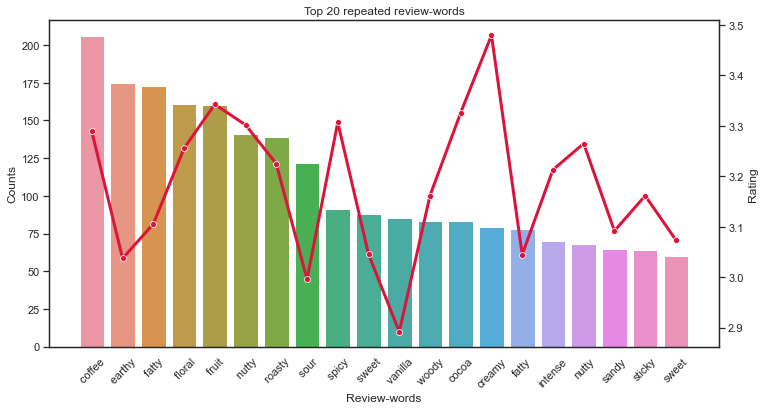

In [316]:
sns.set_style("white")
ax=sns.barplot(x=df3.index,y=df3.array)
plt.xticks(rotation=45)
ax2 = ax.twinx()
sns.lineplot(x=df7.index, y=df7.array, marker='o', color='crimson', lw=3, ax=ax2)
ax.set_xlabel('Review-words')
ax.set_ylabel('Counts')
ax2.set_ylabel('Rating')
plt.title("Top 20 repeated review-words")
plt.show()

From figure above,we can see the top 20 repeated words in the reviews.The most frequent word is coffee has average rating of 3.28.The highest  average rating is 3.47 with corresponding review word "creamy".From that,we can conclude that consumers reviewed product as "creamy" tend to like the product.On the contrary,the word "vanilla" has the lowest average rating which is 2.89. Consumers reviewed product as "vanilla"  tend to find product as disappointing.

# 8.Summary 

* Highest ratings comes from Vietnam and lowest ratings comes from Australia.
* There is not a strong relationship between number of reviews and average ratings between countries.
* Number of reviews is highest in Venezuella.
* There is a relationship between bean origin and rating.(Not highly)
* There is a strong relationship between rating and cacao_percent.Consumers prefer cacao in their product around 70 percent.
* Average rating slightly drops without lecithin.
* Consumers reviewed product as "creamy" tend to like the product.On the contrary,consumers reviewed product as "vanilla"  tend     to find product as disappointing


